In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.preprocessing.image import load_img
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

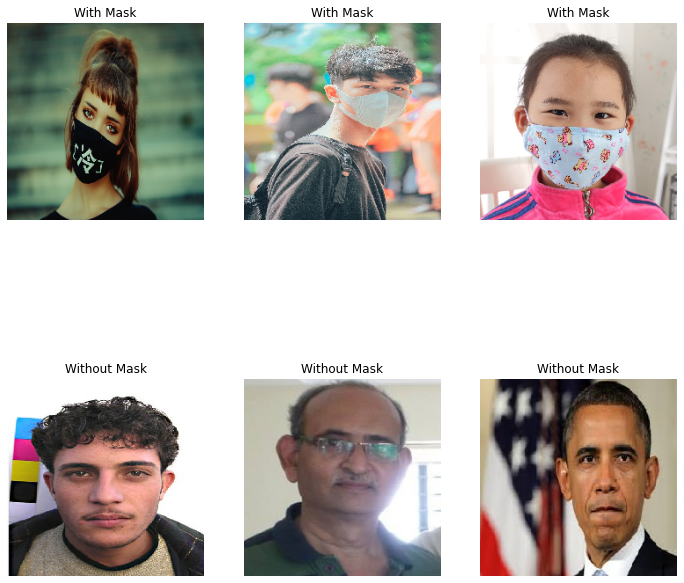

In [2]:
path = "New Masks Dataset/Data/"
plt.figure(figsize = (12, 12))
for i in range(1, 7, 1):
    plt.subplot(2, 3, i)
    img = load_img(path + '0' + str(i) + '.jpg', target_size = (224, 224))
    plt.imshow(img)
    plt.axis('off')
    if i < 4:
        plt.title("With Mask")
    else:
        plt.title("Without Mask")

In [3]:
# Dataset Ready
def get_data(filepath):
    x , y = list(), list()
    category = {'Mask' : 1 , 'Non Mask' : 0}
    folders = os.listdir(filepath)
    for folder in folders:
        folder_path = os.path.join(filepath , folder)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            img = cv2.resize(cv2.imread(file_path), (224, 224))
            x.append(img)
            y.append(category[folder])
        print('done', folder)
    x = np.array(x)
    y = np.array(y)
    x, y = shuffle(x, y)
    x = x/255
    print("Shape of X array : ", x.shape)
    print("Shape of Y array : ", y.shape)
    return x, y
            
        

In [4]:
train_x, train_y = get_data('New Masks Dataset/Train')

done Mask
done Non Mask
Shape of X array :  (600, 224, 224, 3)
Shape of Y array :  (600,)


In [5]:
test_x, test_y = get_data('New Masks Dataset/Test')

done Mask
done Non Mask
Shape of X array :  (100, 224, 224, 3)
Shape of Y array :  (100,)


In [6]:
val_x, val_y = get_data('New Masks Dataset/Validation')

done Mask
done Non Mask
Shape of X array :  (306, 224, 224, 3)
Shape of Y array :  (306,)


In [7]:
#Define the Model
def define_model():
    cnn = Sequential()
    cnn.add(Conv2D(128,(3,3),padding='same',activation='relu', input_shape = (224, 224, 3)))
    cnn.add(Dropout(0.25))
    cnn.add(MaxPool2D((2,2),padding='valid'))

    cnn.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    cnn.add(Dropout(0.25))
    cnn.add(MaxPool2D((2,2),padding='valid'))
                        
    cnn.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    cnn.add(Dropout(0.25))
    cnn.add(MaxPool2D((2,2),padding='valid'))
  
    cnn.add(Flatten())
                                
   
    cnn.add(Dense(32,activation='relu'))          
    cnn.add(Dense(1,activation='sigmoid'))
    cnn.summary()
    return cnn


In [8]:
cnn_model = define_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 128)     3584      
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        7

In [9]:
#Cross entropy functions are used for classification problems
cnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
training_history = cnn_model.fit(train_x , train_y , epochs = 10, batch_size = 10, 
        validation_data = (val_x, val_y))

Epoch 1/10
60/60 [==============================] - 144s 2s/step - loss: 0.6225 - accuracy: 0.6217 - val_loss: 0.5162 - val_accuracy: 0.7974
Epoch 2/10
60/60 [==============================] - 149s 2s/step - loss: 0.3406 - accuracy: 0.8750 - val_loss: 0.4280 - val_accuracy: 0.8529
Epoch 3/10
60/60 [==============================] - 144s 2s/step - loss: 0.3048 - accuracy: 0.8667 - val_loss: 0.3857 - val_accuracy: 0.8072
Epoch 4/10
60/60 [==============================] - 159s 3s/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.3918 - val_accuracy: 0.8235
Epoch 5/10
60/60 [==============================] - 157s 3s/step - loss: 0.1664 - accuracy: 0.9350 - val_loss: 0.3852 - val_accuracy: 0.8627
Epoch 6/10
60/60 [==============================] - 145s 2s/step - loss: 0.1178 - accuracy: 0.9633 - val_loss: 0.3477 - val_accuracy: 0.8431
Epoch 7/10
60/60 [==============================] - 146s 2s/step - loss: 0.1023 - accuracy: 0.9600 - val_loss: 0.3206 - val_accuracy: 0.8693
Epoch 8/10
60

In [14]:
training_history = pd.DataFrame(training_history.history)
training_history

,loss,accuracy,val_loss,val_accuracy
0,0.622489,0.621667,0.516163,0.797386
1,0.340612,0.875000,0.427953,0.852941
2,0.304821,0.866667,0.385651,0.807190
3,0.282550,0.895000,0.391834,0.823529
4,0.166369,0.935000,0.385224,0.862745
5,0.117759,0.963333,0.347718,0.843137
6,0.102329,0.960000,0.320557,0.869281
7,0.053015,0.978333,0.397874,0.859477
8,0.086976,0.970000,0.365667,0.843137
9,0.104025,0.958333,0.417256,0.846405


## Analysing Performance of Model

In [29]:
y_pred = []
for pred in cnn.predict(test_x):
    if pred > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred = np.array(y_pred)
print("\n\n confusion matrix : \n\n", confusion_matrix(test_y, y_pred))
print("\n\n classification report : \n\n", classification_report(test_y, y_pred))



 confusion matrix : 

 [[46  4]
 [ 8 42]]


 classification report : 

               precision    recall  f1-score   support

           0       0.85      0.92      0.88        50
           1       0.91      0.84      0.87        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



## Plotting Loss and Accuracy per Epochs

In [30]:
fig = px.line(training_history[['loss','val_loss']],labels={'value':'<-- Loss','index':'Epochs -->'})
fig.update_layout(title={'text':'Loss Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show()
fig = px.line(training_history[['accuracy','val_accuracy']],labels={'value':'Accuracy -->','index':'Epochs -->'})
fig.update_layout(title={'text':'Accuracy Per Epochs','font_size':23,'font_color':'orange','font_family':'Georgia','x':0.5})
fig.show()

## Using Opencv for Face Mask Detection

In [10]:
cnn = load_model("mask_detection.h5")

In [11]:
def predict(img):
    label = str()
    img2 = load_img(img , target_size = (224, 224))
    plt.imshow(img2)
    plt.axis('off')
    img = cv2.imread(img)
    img = cv2.resize(img,(224,224))
    img = img / 255
    if cnn.predict(np.array([img]))[0] > 0.5:
        label = 'Mask Detected' # Mask Recognized
    else:
        label = 'Mask Not Detected' # Mask not Recognized
    plt.title(label)

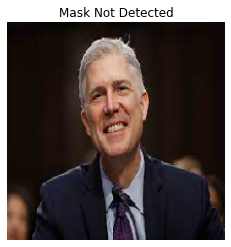

In [12]:
predict('maskimg.jpg')

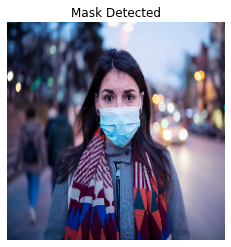

In [13]:
predict('sample2.jpg')